# Проверка гипотез и проведение А/В теста

**Цель:** Проверка гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**План работ:**
- Изучить данные
- Провести предобработку данных
- Провести приоритизацию гипотез (применить фреймворк ICE, примените фреймворк RICE)
- Проанализировать А/В-тест

## Шаг. Изучить данные

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from scipy import stats as st
from IPython.display import display

In [2]:
# загрузим данные
try:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
)
except:
    'FileNotFoundError'

In [3]:
# выведем основную информацию и количество пропущенных значений датафрейма hypothesis
display(hypothesis)
display(hypothesis.info())
hypothesis.isna().sum()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Посмотрев данные и основную информацию о них, можно сделать вывод, что таблица *hypothesis* содержит 9 гипотез и оценки по 4-м показателям. Пропущенных значений нет, необходимо привести названия столбцов к нижнему регистру.

In [4]:
# выведем основную информацию и количество пропущенных значений датафрейма orders
display(orders.head())
display(orders.info())
orders.isna().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

В таблице *orders* также нет пропущенных значений, необходимо преобразовать в нужный тип столбец, который содержит данные с датой.

In [5]:
# выведем основную информацию и количество пропущенных значений датафрейма visitors
display(visitors.head())
display(visitors.info())
visitors.isna().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

Аналогичная картина с таблицей *visitors*: нет пропущенных значений, необходимо преобразовать в нужный тип столбец, который содержит данные с датой.

**Вывод:** Изучили информацию о данных в таблицах. Для дальнейшей работы с данными необходимо:
- привести названия столбцов к нижнему регистру в таблице *hypothesis*
- преобразовать в нужный тип столбцы, которые содержат данные с датой, в таблицах *orders* и *visitors*
- проверить данные на дубликаты

## Шаг. Предобрботка данных

In [6]:
# преобразуем названия столбцов таблицы hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [7]:
# преобразуем данных о дате
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
# проверим наличие явных дубликатов
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

0

**Вывод:** Предобработка данных проведена: привели названия столбцов в таблице *hypothesis* к нижнему регистру, преобразовали в нужный тип столбцы, которые содержат данные с датой, в таблицах orders и visitors, дубликаты не выявлены.

## Шаг. Приоритизация гипотез

### Применим фреймворк ICE

Рассчитаем приоритезацию гипотез мотодом ICE по формуле:<br>
**ICE = (Impact * Confidence) / Efforts**

In [9]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
pd.set_option('display.max_colwidth', 400)
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее перспективные гипотезы по ICE: 9, 1, 8

### Применим фреймворк RICE

Рассчитаем приоритезацию гипотез мотодом RICE по формуле:<br>
**RICE = (Reach * Impact * Confidence) / Efforts**

In [10]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7

**Вывод:**<br>
- Наиболее перспективные гипотезы по ICE: 9, 1, 8.
- Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7.

При применении RICE вместо ICE, приоритизация гипотез изменилась. Самой перспективной гипотезой при применении RICE оказалась гипотеза 8, т.к. охват этой гипотезы, а именно параметр *reach*, равен максимальному значению 10, что и повлияло на приоритет этой гипотезы.

In [11]:
cm = sns.light_palette("green", as_cmap=True)
hypothesis[['hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False).style.background_gradient(cmap=cm)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


## Шаг. Анализ А/В-теста

Проверим есть ли пользователи, которые попали в обе группы.

In [12]:
# подсчитаем сколько уникальных идентификаторов пользователей
len(orders['visitorId'].unique())

1031

In [13]:
# теперь посмотрим количество пользователей в группах
orders.groupby('group')['visitorId'].count()

group
A    557
B    640
Name: visitorId, dtype: int64

Из полученных данных видим несостыковку, всего у нас 1031 пользователей, а если просуммировать пользователей в группе А и группе В получим 1197. Значит у нас есть пользователи которые попали в обе группы. Это

In [14]:
# составим список пользователей, которые попали в обе группы
bad_users = np.intersect1d(orders.query('group == "A"')['visitorId'], orders.query('group == "B"')['visitorId'])
len(bad_users)

58

In [15]:
# удалим этих пользователей из данных
orders = orders.query('visitorId not in @bad_users')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### Построить график кумулятивной выручки по группам.

In [16]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# Получим строки таблицы orders, дата которых меньше или равна дате из datesGroups, а группа  равна группе из datesGroups
# Вычислим максимальную дату, рассчитаем максимум для группы, найдём число уникальных ID заказов и пользователей, 
# подсчитаем сумму средних чеков
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# Аналогичные действия проделаем для таблицы visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
# Объединим обе таблицы в одну и переименуем названия столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


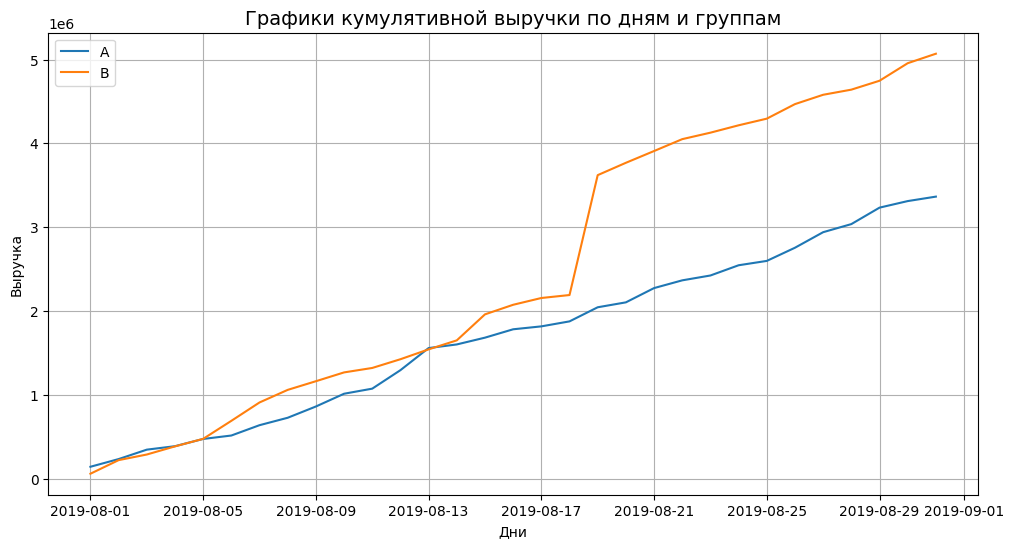

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Построим график выручки группы А и группы В по дням
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по дням и группам', fontsize=14)
plt.xlabel('Дни')
plt.ylabel('Выручка')
plt.legend() 
plt.show()

Выручка увеличивается в течение всего теста. Но график выручки группы В резко растет с 18.08.2019 по 19.08.2019. Это может сигнализировать об аномальном числе заказов, либо об аномально дорогих заказах в выборке. 

### Построить график кумулятивного среднего чека по группам.

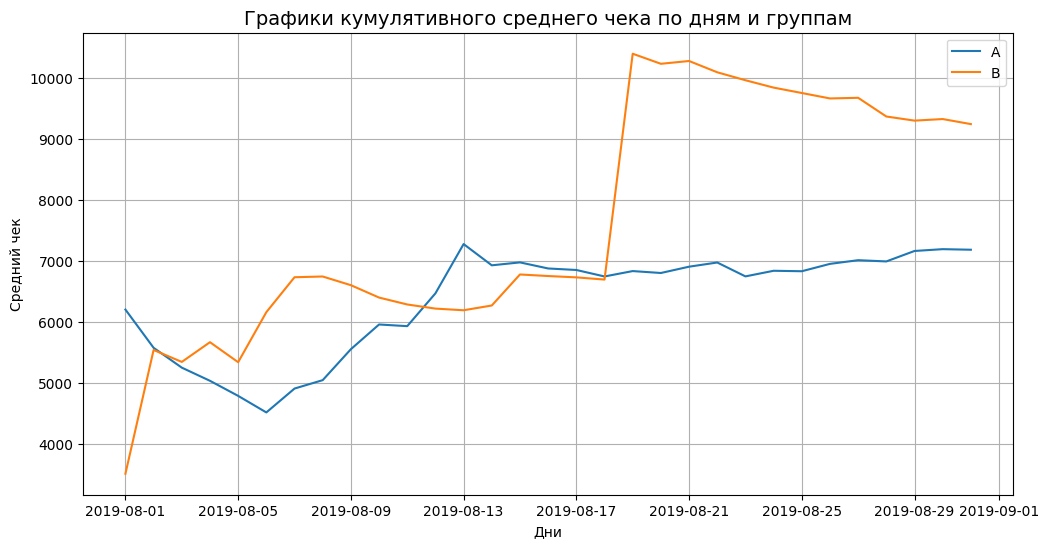

In [18]:
# Разделим кумулятивную выручку на кумулятивное число заказов и построим графики среднего чека по группам
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по дням и группам', fontsize=14)
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

График кумулятивного среднего чека сильно колеблется, но здесь также виден всплеск группы В. Необходимо проанализировать выбросы, которые вызывают такие всплески.

### Построить график относительного различия кумулятивного среднего чека группы B к группе A.

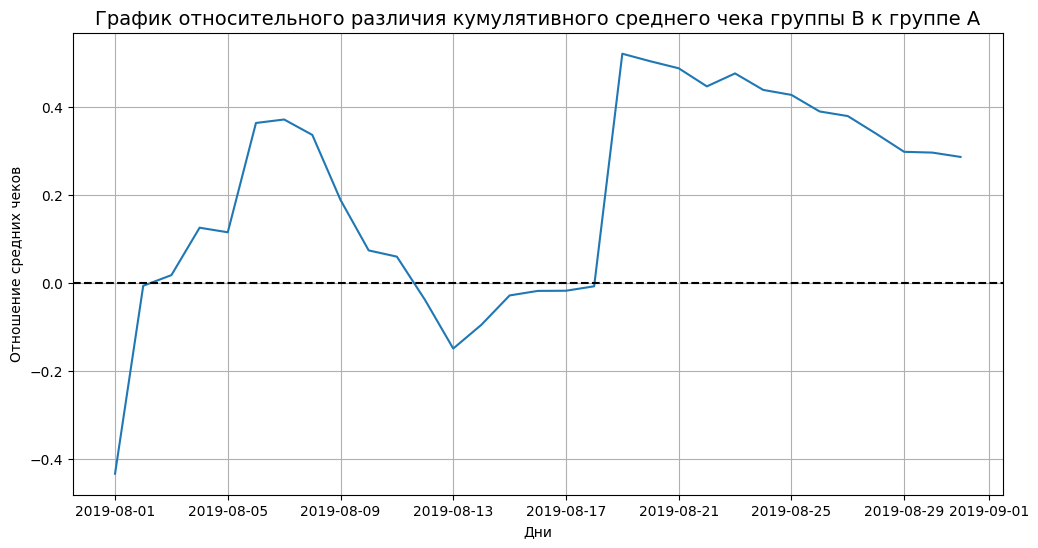

In [19]:
# Собирём данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построим график относительного различия для среднего чека
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# Добавим ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дни')
plt.ylabel('Отношение средних чеков')
plt.show()

В нескольких местах графика наблюдаются резкие скачки относительного различия кумулятивного среднего чека. Скорее всего там и будут аномально крупные заказы.

### Построить график кумулятивного среднего количества заказов на посетителя по группам.

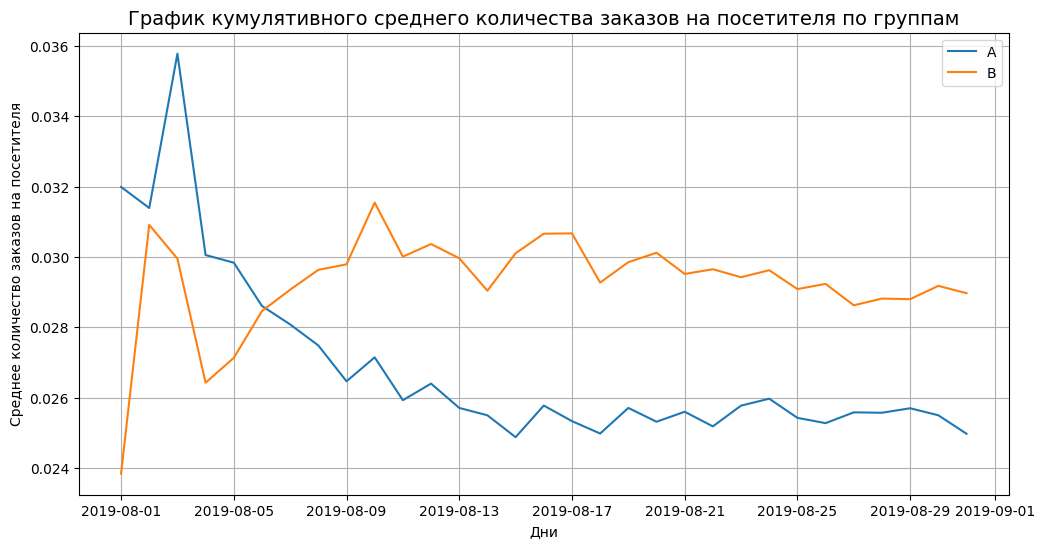

In [20]:
# Посчитаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A и группе B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Построим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дни')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.show()

В начале теста графики сильно скакали, но постепенно стабилизировались. Кумулятивное среднее количества заказов группы А в начале теста было больше, и затем пошло на спад, а среднее количество заказов группы В вырвалось вперёд.

### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

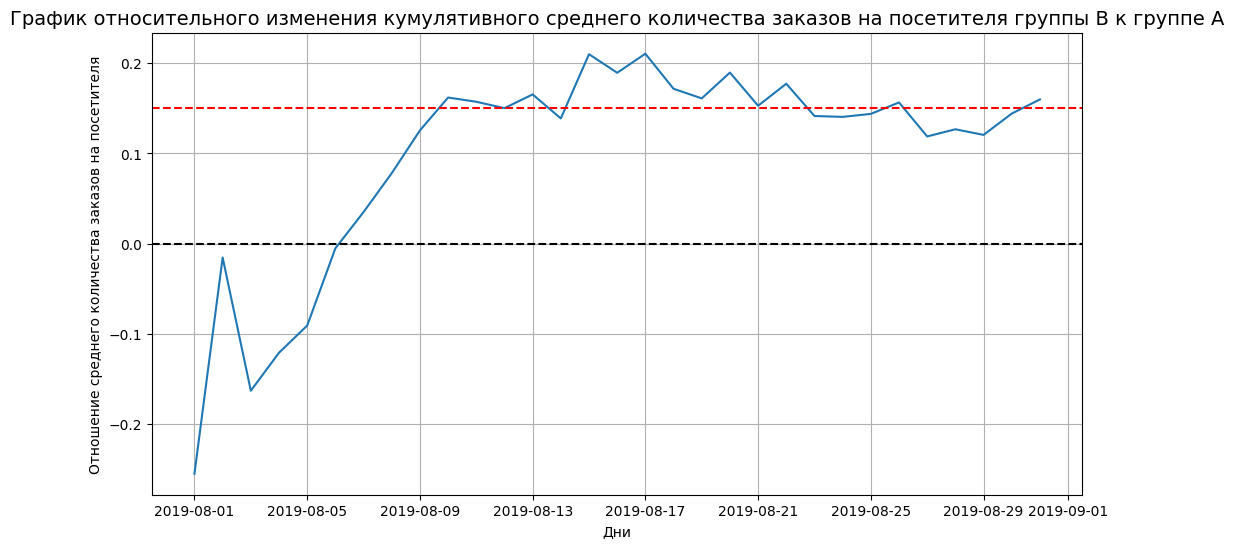

In [21]:
# Собирём данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Построим график относительного различия для среднего количества заказов
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
# Добавим ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дни')
plt.ylabel('Отношение среднего количества заказов на посетителя')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и зафиксировалась около прироста в 15% относительно группы А.<br>
Cтоит проанализировать аномалии, возможно, они изменят картину.

### Построить точечный график количества заказов по пользователям.

In [22]:
# Найдём число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactionId']
ordersByUsers.sort_values(by='transactionId', ascending=False).head(10)

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


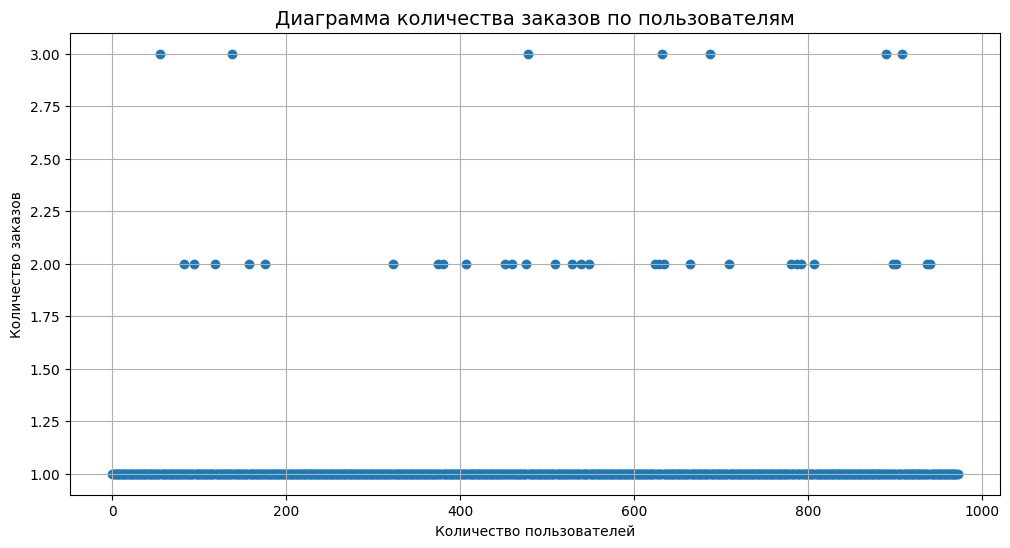

In [23]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 6))
plt.grid()
plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.title('Диаграмма количества заказов по пользователям', fontsize=14)
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Есть пользователи с 2-3 заказами. Пользователей, заказавших больше двух раз достаточно мало, их точная доля не ясна — непонятно, считать их аномалиями или нет.<br>
Посчитаем выборочные перцентили количества заказов на одного пользователя.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.

In [24]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([1., 2.])

Видим, что не более 5% пользователей совершали больше одного заказа, и не более 1% совершили больше двух заказов.

### Построить точечный график стоимостей заказов.

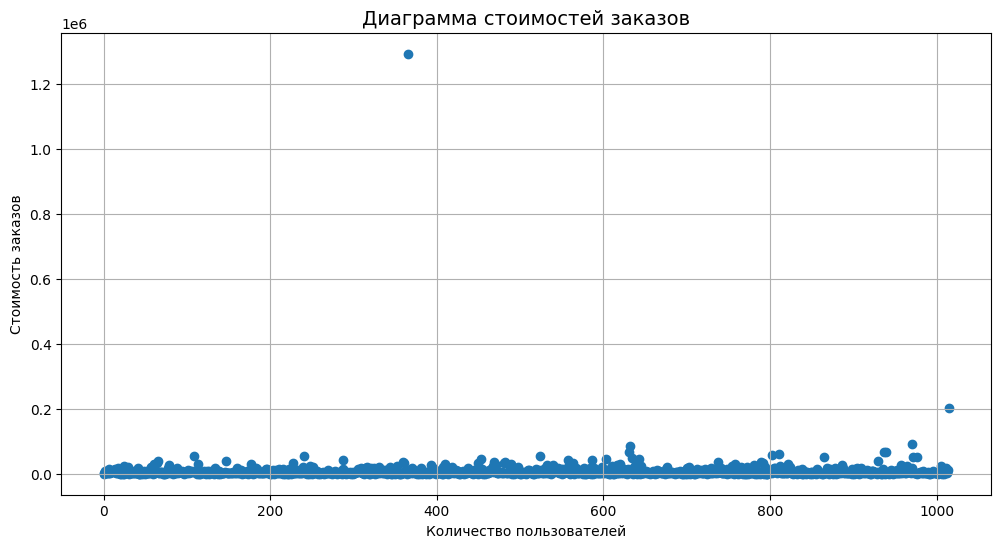

In [25]:
# Построим точечную диаграмму стоимости заказов на одного пользователя
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.title('Диаграмма стоимостей заказов', fontsize=14)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

На графике четко видно два аномальных значения в районе 1 250 000 и 200 000. Исключим эти данные, чтобы увидеть распределение нагляднее.

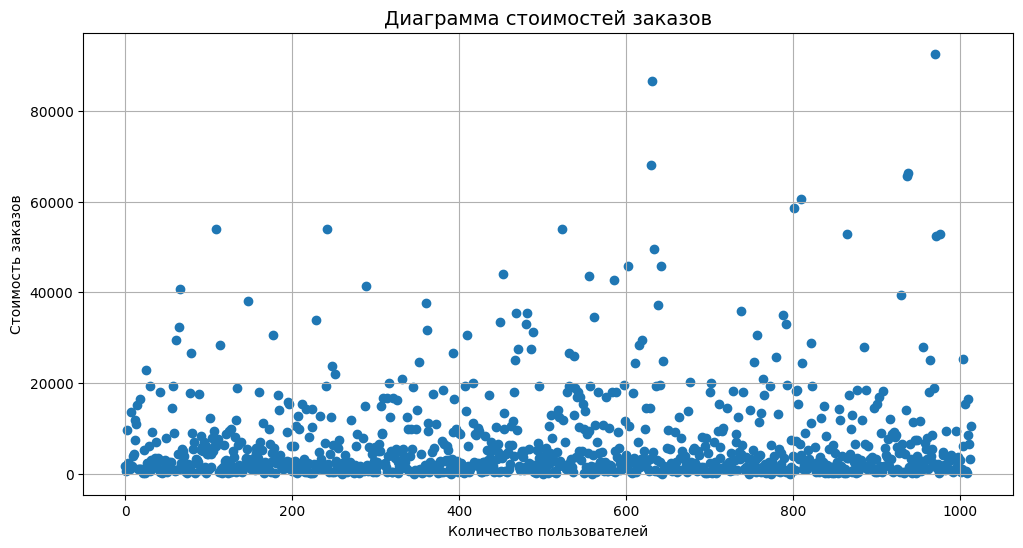

In [26]:
# сделаем срез данных и исключим 2 выбивающихся значения
orders_query = orders.query('revenue < 200000')
x_values = pd.Series(range(0,len(orders_query['revenue'])))
plt.figure(figsize=(12, 6))
plt.grid()
plt.scatter(x_values, orders_query['revenue']) 
plt.title('Диаграмма стоимостей заказов', fontsize=14)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Видим, что в целом заказов дороже 20 000 не очень много, и есть единичные значения больше 60 000. Найдем выборочные перцентили выручки с заказов по пользователям.

###  Посчитать 95-й и 99-й перцентили стоимости заказов.

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Получается, что не более 5% заказов дороже 26 758, а дороже 53 904 только 1% заказов.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.<br>
**Н0:** Нет различий в среднем количестве заказов между группами.<br> 
**Н1:** Есть различия в среднем количестве заказов между группами.

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [29]:
# Создадим переменные, с идентификарами пользователей, которые заказывали хотя бы 1 раз, и числом совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [30]:
# Создадим переменные, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                                           - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                                           - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [31]:
# Выведим p-value для сравнения среднего количества заказов между группами по "сырым" данным.
display("p-value различий в среднем количестве заказов: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
"Относительное различие в среднем между группами: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)

'p-value различий в среднем количестве заказов: 0.011'

'Относительное различие в среднем между группами: 0.160'

**Вывод:** p-value = 0.011, что меньше 0.05. Значит, нулевую гипотезу отвергаем, по «сырым» данным различия в среднем числе заказов групп A и B есть статистически значимые различия.<br>
Относительное различие в среднем между группами 16%.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем чеке на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.<br>
**Н0:** Нет различий в среднем чеке между группами.<br> 
**H1:** Есть различия в среднем чеке между группами.

In [32]:
# Выведим p-value для сравнения средних чеков между группами по "сырым" данным. 
display('p-value различий в среднем чеке заказа: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
'Относительное различие среднего чека между группами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'p-value различий в среднем чеке заказа: 0.829'

'Относительное различие среднего чека между группами: 0.287'

**Вывод:** По «сырым» данным различий в среднем чеке групп A и B нет. 
p-value = 0.829 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов, и совершил заказ на сумму свыше 40 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% с заказами с наибольшей стоимостью.

In [33]:
order_lim = 2
revenue_lim = 40000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_lim]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_lim]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape[0]

30

Получили 30 аномальных пользователей. 

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «очищенным» от выбросов данным.<br>
**Н0:** Нет различий в среднем количестве заказов между группами.<br> 
**Н1:** Есть различия в среднем количестве заказов между группами.

In [34]:
# Очистим наши данные от аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),name='orders')], axis=0,
)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders')], axis=0,
) 
# Выведим p-value для сравнения среднего количества заказов между группами.
display('p-value различий в среднем количестве заказов: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
'Относительное различие в среднем между группами: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'p-value различий в среднем количестве заказов: 0.004'

'Относительное различие в среднем между группами: 0.205'

**Вывод:** p-value = 0.004, что попрежнему меньше 0.05. Значит, нулевую гипотезу отвергаем. После удаления аномальных данных p-value различий в среднем количестве заказов стал еще меньше.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Посчитаем статистическую значимость различий в среднем чеке на пользователя между группами по «очищенным» данным.<br>
**Н0:** Нет различий в среднем чеке между группами.<br> 
**H1:** Есть различия в среднем чеке между группами.

In [35]:
display('p-value различий в среднем чеке заказа: {0:.3f}'.format(
        st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]
    ))
'Относительное различие среднего чека между группами: {0:.3f}'.format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1
    )

'p-value различий в среднем чеке заказа: 0.937'

'Относительное различие среднего чека между группами: 0.055'

**Вывод:** После исключения аномалий р-value увеличился, и всё также больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Относительное различие среднего чека между группами составило всего 5.5%, значит после удаления выбросов в данных стало меньше шума. <br>
В итоге общие выводы по результатам теста не изменились, но несмотря на это надо помнить, что аномалии могут сильно влиять на результаты A/B-теста.

### Решение по результатам теста.

Остановить тест, зафиксировать победу группы В.
- Есть статистически значимое различие в среднем количестве заказов между группами и по "сырым", и по "очищенным" от аномалий данным.
- Статистически значимые различия в средних чеках групп A и B отстутствуют, также по "сырым" и по "очищенным" данным.
- График относительного изменения кумулятивного среднего количества заказов на посетителя показывает, что результаты группы B лучше группы A и зафиксировались около прироста в 15%.

## Выводы по проекту

Мы изучили данные, провели предобработку данных (названия столбцов перевели в нижний регистр, преобразовали данные в столбцах с датой к нужному типу).

Далее провели приоритезацию гипотез. При применении RICE вместо ICE, приоритизация гипотез изменилась.
- Наиболее перспективные гипотезы по ICE: 9, 1, 8.
- Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7.

Далее провели анализ А/В-теста.
- Нашли и исключили пользователей, которые попали в обе группы.
- График кумулятивной выручки увеличивается в течение всего теста, наблюдается резкий рост группы В.
- График кумулятивного среднего чека сильно колеблется, но здесь также виден всплеск группы В.
- Кумулятивное среднее количества заказов группы А в начале теста было больше, и затем пошло на спад, а среднее количество заказов группы В вырвалось вперёд.
- В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и зафиксировалась около прироста в 15% относительно группы А.

Посчитали 95-й и 99-й перцентили количества и стоимости заказов на пользователя и определили границы аномальных пользователей.

При проверке статистической значимости гипотез и по "сырым" и по "очищенным" данным выявили:
- Различия в среднем количестве заказов между группами есть.
- Различий в среднем чеке между группами нет.

По результатам анализа приняли решение: Остановить тест, зафиксировать победу группы В.